In [1]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

In [11]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

In [4]:
# Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars (GOLDAMGBD228NLBM) 

# https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM
fred = FredReader(['GOLDAMGBD228NLBM'], start=datetime.today() - timedelta(days=365*100)).read()
fred

,GOLDAMGBD228NLBM
DATE,
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-10-26,1801.90
2021-10-27,1783.85
2021-10-28,1798.20


In [5]:
df = pd.DataFrame()
df['gold'] = fred['GOLDAMGBD228NLBM'].ffill().dropna()

In [6]:
df['gld'] = yfin.Ticker('GLD').history(period='max')['Close']

In [8]:
df = df.ffill().dropna()
df

,gold,gld
DATE,,
2004-11-18,444.30,44.380001
2004-11-19,443.70,44.779999
2004-11-22,447.00,44.950001
2004-11-23,447.00,44.750000
2004-11-24,448.65,45.049999
...,...,...
2021-10-26,1801.90,167.679993
2021-10-27,1783.85,168.119995
2021-10-28,1798.20,168.080002


In [9]:
ret = (df/df.shift(365, freq='D')).dropna()
ret

,gold,gld
DATE,,
2005-11-18,1.098132,1.091933
2005-11-22,1.102908,1.097219
2005-11-23,1.093624,1.098324
2005-11-24,1.098295,1.091010
2005-11-25,1.097410,1.097003
...,...,...
2021-10-22,0.935024,0.938154
2021-10-26,0.947570,0.939121
2021-10-27,0.939412,0.939113


<AxesSubplot:xlabel='DATE'>

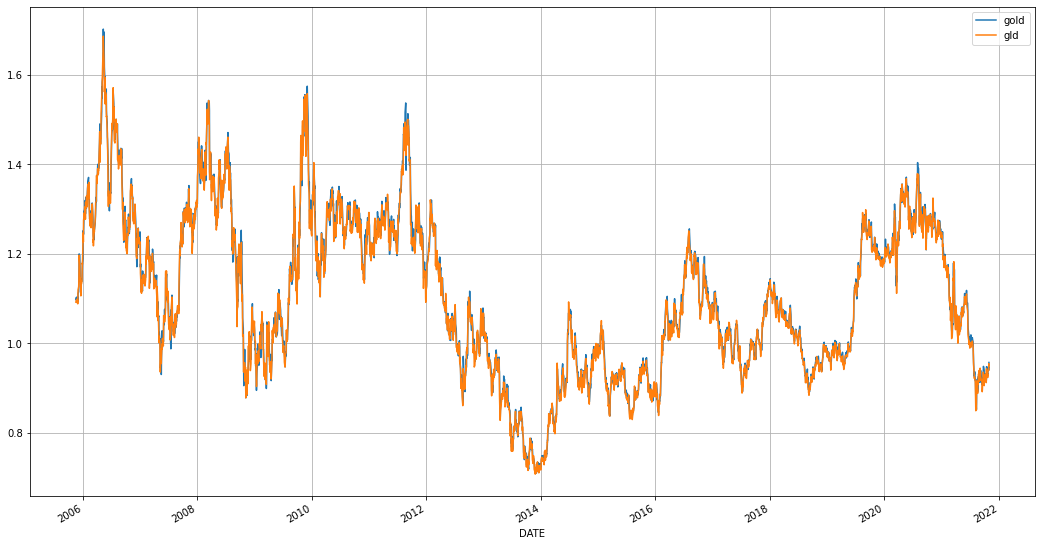

In [13]:
ret.plot(grid=True)